<a href="https://colab.research.google.com/github/sde-Pratik/Predicting_Healthcare_Insurance_Costs_Project/blob/main/Predicting_Healthcare_Insurance_Costs_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import cross_val_score

insurance = pd.read_csv('insurance.csv')

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [2]:
## Task #1: Clean up the data
# - Are there any missing values?
# - Standardize categories in region
# - Standardize sex to just two categories
# - Change smoker column to boolean
# - Standardize charges data type (float)




insurance_filled = insurance.dropna()


insurance_filled['region'] = insurance_filled['region'].str.lower()


FEMALE = 'female'
MALE = 'male'

sex_map = {'F':FEMALE,'woman':FEMALE,'man':MALE,'M':MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)

insurance_filled['smoker'] = insurance_filled['smoker']=='yes'

insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')

insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)


insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


<ipython-input-2-69e3f44f9e90>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
<ipython-input-2-69e3f44f9e90>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
<ipython-input-2-69e3f44f9e90>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

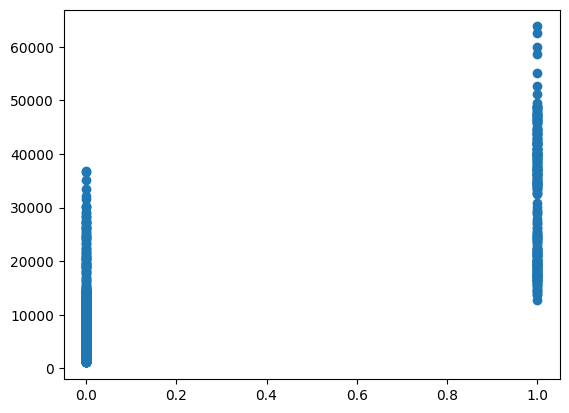

In [3]:
import matplotlib.pyplot as plt

# Task #2: Scatterplots of relationships between variables & charges
df = insurance_pos.copy()

plt.scatter(df['smoker'], df['charges'])

In [4]:
# Task #3 - Prepare the data for a model fitting

df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')

df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna()
df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   bool   
 6   region_northwest  1207 non-null   bool   
 7   region_southwest  1207 non-null   bool   
 8   is_male           1207 non-null   int64  
dtypes: bool(3), float64(4), int64(2)
memory usage: 69.5 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872818

In [6]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])

    return df_new

In [7]:
# Implement model creation and training here
# Use as many cells as you need

# Task #5, see how model performs on validation dataset
# Subtask - Create helper function to preprocess dataframe

val_df = pd.read_csv('validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
